In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Disease_symptom_and_patient_profile_dataset.csv'

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [31]:
data.shape

(349, 10)

In [32]:
data.rename(columns={'Outcome Variable': 'Results'},inplace=True)

In [33]:
data.head(1)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive


In [34]:
data2 = data.copy()

In [35]:
data2.head(2)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Results               349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [37]:
data2.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Results                 0
dtype: int64

In [38]:
data2.duplicated().sum()

49

In [39]:
data2 = data2.drop_duplicates(keep='first')

In [14]:
data2.duplicated().sum()

0

In [40]:
data2.shape

(300, 10)

In [271]:
from sklearn.preprocessing import LabelEncoder

In [291]:
le = LabelEncoder()

In [292]:
import warnings
warnings.simplefilter('ignore')
for col in data2.columns:
    if data2[col].dtype == 'object':
        data2[col] = le.fit_transform(data2[col])

In [293]:
data2.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
5,37,1,0,0,0,25,0,2,2,1


<Axes: xlabel='Results', ylabel='count'>

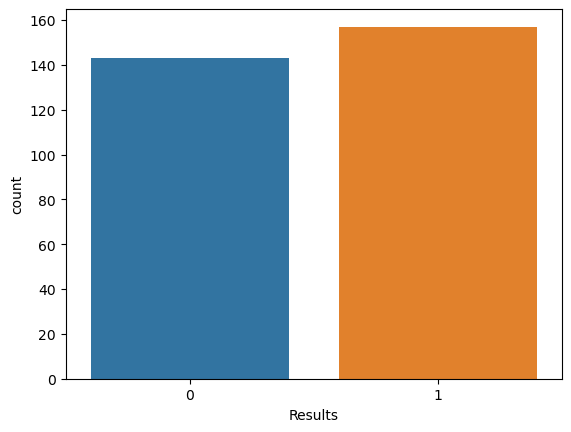

In [294]:
import seaborn as sns
sns.countplot(x = 'Results' , data = data2)

In [295]:
x = data2.drop('Results', axis=1)

In [296]:
y = data2['Results']

In [297]:
x.head(3)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,56,1,0,1,1,19,0,1,2
1,24,0,1,1,0,25,0,2,2
2,37,0,1,1,0,25,0,2,2


In [298]:
y.head(3)

0    1
1    0
2    0
Name: Results, dtype: int32

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [301]:
xtrain.shape

(210, 9)

In [302]:
ytrain.shape

(210,)

In [303]:
from sklearn.tree import DecisionTreeClassifier

In [304]:
dtc = DecisionTreeClassifier()

In [305]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [306]:
dtc.score(xtrain,ytrain)

1.0

In [307]:
dtc.score(xtest,ytest)

0.7

In [308]:
from sklearn.metrics import RocCurveDisplay

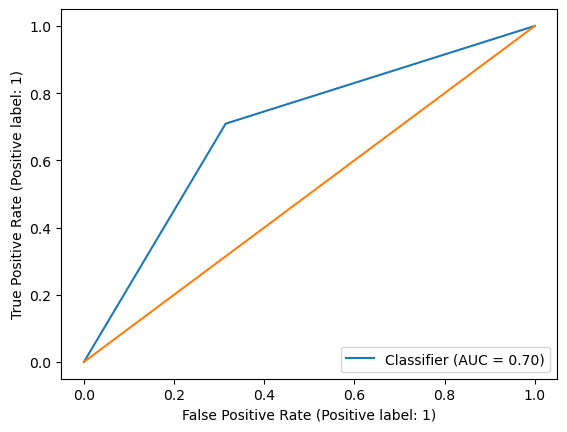

In [309]:
RocCurveDisplay.from_predictions(dtc.predict(xtest) , ytest)
plt.plot([0,1],[0,1])